In [2]:
import torch
from torch.utils.data import Dataset
import torch.nn.functional as F
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import itertools 
import random
import numpy as np
import matplotlib.lines as mlines
import pickle
import io

class CPU_Unpickler(pickle.Unpickler):
    def find_class(self, module, name):
        if module == 'torch.storage' and name == '_load_from_bytes':
            return lambda b: torch.load(io.BytesIO(b), map_location='cpu')
        else:
            return super().find_class(module, name)
def load_file(f):
    with open(f, "rb") as rb:
        pickle.load(rb)
        #return pickle.load(rb)
        return CPU_Unpickler(rb).load()

In [3]:
def choice_lr(net,s,s0,L):
    if net=="cnn2":
        if s>2:
            if s0<4:
                lr = 0.01
            elif s0==4:
                lr = 0.003
            elif s0==6:
                lr = 0.0003
            if s==3 and n==4:
                if s0<4:
                    lr = 0.003
        else:
            if s0>0:
                if L>=3:
                    if s0<4:
                        lr = 0.01
                    elif s0==4:
                        lr = 0.003
                    else:
                        lr = 0.001
                elif L==2:
                    if s0<4:
                        lr = 0.1
                    elif s0==4:
                        lr = 0.03
                    else:
                        lr = 0.01
            else:
                lr = 0.01
            if L==1:
                if s0<4:
                    lr = 0.1
                else:
                    lr = .03
    elif net=='lcn':
        if s>2:
            lr = .003
        else:
            if s0<4:
                lr = 0.01
            else:
                lr = 0.003
    return lr

def training_point(net,s,s0,L,n,m):
    if net=='lcn':
        if s==2:
            p_pred = n**(L)
            #pmax = ((2*s0+2)**(2**L -1))*n**(2**L)


            if s0 <4:
                xx= np.logspace(np.log10(int(p_pred)),np.log10(200*p_pred),15)
                xx =xx[:-1]
            else:
                xx= np.logspace(np.log10(p_pred),np.log10(500*p_pred),15)
                xx =xx[:-1]
                #xx1 = np.array([107999,135917])
                #xx = np.concatenate((xx,xx1))
        if s>2:
            p_pred = ((s0+1)**L)*m**(L)
            
            xx= np.logspace(np.log10(int(0.1*p_pred)),np.log10(10*p_pred),10)
            xx1 = np.logspace(np.log10(10*p_pred),np.log10(100*p_pred),10)
            xx = np.concatenate((xx,xx1))
    else:
        if s>2: 
            p_pred = n**(L)
            #pmax = ((2*s0+2)**(2**L -1))*n**(2**L)


            if s0 <=4:
                xx= np.logspace(np.log10(int(p_pred)),np.log10(100*p_pred),15)
                xx =xx[:-1]
            else:
                xx= np.logspace(np.log10(p_pred),np.log10(500*p_pred),15)
                xx =xx[:-1]
                #xx1 = np.array([107999,135917])
                #xx = np.concatenate((xx,xx1))

            if s==3 or s==4:
                if L==2:
                    xx1= np.logspace(np.log10(100*p_pred),np.log10(500*p_pred),15)
                    xx = np.concatenate((xx,xx1))
                    xx1= np.logspace(np.log10(500*p_pred),np.log10(1000*p_pred),15)
                    xx = np.concatenate((xx,xx1))
                if s==4:
                    xx1= np.logspace(np.log10(1000*p_pred),np.log10(2000*p_pred),10)                            
                    xx = np.concatenate((xx,xx1))
                    xx1= np.logspace(np.log10(2000*p_pred),np.log10(10000*p_pred),10)                            
                    xx = np.concatenate((xx,xx1))
                    xx1= np.logspace(np.log10(10000*p_pred),np.log10(50000*p_pred),10)                            
                    xx = np.concatenate((xx,xx1))
                if s==3 and s0==4:
                    xx1= np.logspace(np.log10(int(1000*p_pred)),np.log10(10000*p_pred),10)
                    xx = np.concatenate((xx,xx1))
        else:
            p_pred = n**(L+1)
            #pmax = ((2*s0+2)**(2**L -1))*n**(2**L)
            if L>1:
                if s0>0:
                    if L>=3:
                        pmax = 110000

                        if s0 <4:
                            xx= np.logspace(np.log10(p_pred),np.log10(100*p_pred),15)

                        else:
                            xx= np.logspace(np.log10(p_pred),np.log10(300*p_pred),15)
                        if s0==1:
                            if n==8 or n==10:
                                xx0 = np.logspace(np.log10(int(0.1*p_pred)),np.log10(p_pred),5)
                                xx0 = xx0[:-1]
                                xx = np.concatenate((xx0,xx))
                    elif L==2:
                        pmax = ((2*s0+2)**(2**L -1))*n**(2**L)
                        p_pred = n**(L+1)
                        p_max_used = min(pmax,110000)
                        #p_pred = n**(L+1)
                        if s0>=4:
                            xx= np.logspace(np.log10(p_pred),np.log10(p_max_used),15)
                        else:
                            xx= np.logspace(np.log10(p_pred),np.log10(pmax),15)

                else:
                    p_pred_red = n**L
                    xx= np.logspace(np.log10(int(0.2*p_pred_red)),np.log10(100*p_pred_red),15)
            else:
                p_pred_1 = n**L
                if s0 <4:
                    xx= np.logspace(np.log10(p_pred_1),np.log10(200*p_pred_1),15)

                else:
                    xx= np.logspace(np.log10(p_pred_1),np.log10(500*p_pred_1),15)
            if s==3:
                p_pred = (s0+1)*m**(L)
                #p_max_used = min(pmax,110000)
                #p_pred = n**(L+1)
                if s0 <= 4:
                    #xx1= np.logspace(np.log10(int(1000*p_pred)),np.log10(2000*p_pred),10)
                    #xx = np.concatenate((xx,xx1))
                    xx= np.logspace(np.log10(int(0.1*p_pred)),np.log10(10*p_pred),15)
            xx =xx[:-1]
    return xx

def load_net(net,ptr,n,m,L,s0,s,seed,width,lr):
    if net=='lcn':
        if s>2:
            #net+"_data_L"+str(2)+"_A_0s
            tmp = load_file("lcn_s_L2/hier1_w_0_"+net+"_diffeo_ptr_"+str(ptr)+"_n_"+str(n)+"_m_"+str(m)+"_L_"+str(L)+"_s0_"+str(s0)+"_s_"+str(s)+"_seed_"+str(seed)+"_width_"+str(width)+"_lr_"+str(lr)+".npy")
            #if L>3:
            #    tmp = load_file(net+"_data_L"+str(3)+"_A_0s/hier1_"+net+"_diffeo_ptr_"+str(ptr)+"_n_"+str(n)+"_L_"+str(L)+"_s0_"+str(s0)+"_seed_"+str(seed)+"_width_"+str(width)+"_lr_"+str(lr)+".npy")
        else:
            if L==1:
                #print(ptr)
                tmp = load_file("lcn_L1/hier1_"+net+"_diffeo_ptr_"+str(ptr)+"_n_"+str(n)+"_L_"+str(L)+"_s0_"+str(s0)+"_s_"+str(2)+"_seed_"+str(seed)+"_width_"+str(width)+"_lr_"+str(lr)+".npy")

            else:
                
                #if L<=3:
                tmp = load_file(net+"_data_L"+str(2)+"_A_0s/hier1_"+net+"_diffeo_ptr_"+str(ptr)+"_n_"+str(n)+"_L_"+str(L)+"_s0_"+str(s0)+"_seed_"+str(seed)+"_width_"+str(width)+"_lr_"+str(lr)+".npy")
                
    elif net=='cnn2':                       
        if s>2:
            if ptr>= 176055 and s==4:
                lr_tmp = 0.005
                tmp = load_file("cnn_s_max/hier1_w_0_"+net+"_diffeo_ptr_"+str(ptr)+"_n_"+str(n)+"_m_"+str(m)+"_L_"+str(L)+"_s0_"+str(s0)+"_s_"+str(s)+"_seed_"+str(seed)+"_width_"+str(width)+"_lr_"+str(lr_tmp)+".npy")
            else:
                tmp = load_file("cnn_s_max/hier1_w_0_"+net+"_diffeo_ptr_"+str(ptr)+"_n_"+str(n)+"_m_"+str(m)+"_L_"+str(L)+"_s0_"+str(s0)+"_s_"+str(s)+"_seed_"+str(seed)+"_width_"+str(width)+"_lr_"+str(lr)+".npy")
        else:
            if L==1:
            #print(ptr)
                tmp = load_file("cnn_L1/hier1_"+net+"_diffeo_ptr_"+str(ptr)+"_n_"+str(n)+"_L_"+str(L)+"_s0_"+str(s0)+"_seed_"+str(seed)+"_width_"+str(width)+"_lr_"+str(lr)+".npy")

            else:
                if s0==0:
                    tmp = load_file("check_s0/hier1_"+net+"_diffeo_ptr_"+str(ptr)+"_n_"+str(n)+"_L_"+str(L)+"_s0_"+str(s0)+"_seed_"+str(seed)+"_width_"+str(width)+"_lr_"+str(lr)+".npy")

                else:
                    if L<=3:
                        tmp = load_file(net+"_data_L"+str(L)+"_A_0s/hier1_"+net+"_diffeo_ptr_"+str(ptr)+"_n_"+str(n)+"_L_"+str(L)+"_s0_"+str(s0)+"_seed_"+str(seed)+"_width_"+str(width)+"_lr_"+str(lr)+".npy")
                    if L>3:
                        tmp = load_file(net+"_data_L"+str(3)+"_A_0s/hier1_"+net+"_diffeo_ptr_"+str(ptr)+"_n_"+str(n)+"_L_"+str(L)+"_s0_"+str(s0)+"_seed_"+str(seed)+"_width_"+str(width)+"_lr_"+str(lr)+".npy")
    return tmp


def training_point_new(xx,net,n,m,L,s0,s,width,lr):
    xx_new = []
                
    for ptrx in xx:

        #print(ptrx,pmax)
        ptr = int(ptrx) 


        tmp_seed = 0

        num_seeds = 0
        for (idx_seed,seed) in enumerate(np.array([1])):

            try:

                tmp = load_net(net,ptr,n,m,L,s0,s,seed,width,lr)
                #print('ok')
                #print(tmp[choice]["acc"])
                #tmp_seed += (100-tmp[choice]["acc"])/100
                #print('ok')
                num_seeds +=1
                xx_new.append(ptr)
            except:
                #if s>2:
                #    print("cnn_s_max/hier1_w_0_"+net+"_diffeo_ptr_"+str(ptr)+"_n_"+str(n)+"_m_"+str(m)+"_L_"+str(L)+"_s0_"+str(s0)+"_s_"+str(s)+"_seed_"+str(seed)+"_width_"+str(width)+"_lr_"+str(lr)+".npy")
                #print('s0 not happened: '+str(s0)+'and P: '+str(ptr))
                #print(net+"_data_L"+str(2)+"_A_0s/hier1_"+net+"_diffeo_ptr_"+str(ptr)+"_n_"+str(n)+"_L_"+str(L)+"_s0_"+str(s0)+"_seed_"+str(seed)+"_width_"+str(width)+"_lr_"+str(lr)+".npy")
                pass
    xx_new = torch.tensor(xx_new)
    return xx_new

In [32]:
##TASK TASK TASK


colors = cm.rainbow(np.linspace(0, 1, len(ns)))

###### L=3 ########
#NO WHITENING
choice = "best"

seed = 0
nets =["lcn"]#

def find_closest_position(lst, target):
    closest_index = min(range(len(lst)), key=lambda i: abs(lst[i] - target))
    return closest_index
ns = ns = np.array([4,6,8,10])
sss = [2,3,4]
s0s = [0,1,2,4]
Ls= [2,3]
bs = 20
pstars = torch.zeros(1)

for (idx_L,L) in enumerate(Ls):
    #print('L: '+str(L))
    for (idx_s,s) in enumerate(sss):
        #print('s: '+str(s))

        for (idx_s0,s0) in enumerate(s0s):
            #print('s0: '+str(s0))


            for (idxn,n) in enumerate(ns):
                m = n**(s-1)
                
                
                for (idxnet,net) in enumerate(nets):
                    #print(n)
                    #lr = choice_lr(net,s,s0,L)
                    ''''
                    accs_cnn = []
                    
                    xx = training_point(net,s,s0,L,n)

                    xx_new = training_point_new(xx,net,n,m,L,s0,s,width,lr)

                    for ptrx in xx_new:

                        #print(ptrx,pmax)
                        ptr = int(min(ptrx,pmax)) 

                        if ptr<pmax:
                            tmp_seed = 0

                            num_seeds = 0
                            for (idx_seed,seed) in enumerate(np.array([1])):
                                try:
                                    tmp = load_net(net,ptr,n,m,L,s0,s,seed,width,lr)
                                    tmp_seed += (100-tmp[choice]["acc"])/100
                                    num_seeds +=1
                                except:
                                    pass
                            if num_seeds>0:
                                accs_cnn.append(tmp_seed/num_seeds)
                    '''
                    try:
                        mat_terr = torch.load('mats/mat_terr_L_%d_n_%d_m_%d_s0_%d_s_%d_bs_%d_%s.pt'%(L,n,m,s0,s,bs,net))
                        xx = torch.load('mats/xx_L_%d_n_%d_m_%d_s0_%d_s_%d_bs_%d_%s.pt'%(L,n,m,s0,s,bs,net))
                        '''
                        if (L==3 and s==2) or (s==3 and n==4) or (s==4 and L==2) or (L==2 and s==3 and n==6):
                            print('mats/mat_terr_L_%d_n_%d_m_%d_s0_%d_s_%d_bs_%d_%s.pt'%(L,n,m,s0,s,bs,net))
                            mat_terr = torch.load('mats/mat_terr_L_%d_n_%d_m_%d_s0_%d_s_%d_bs_%d_%s.pt'%(L,n,m,s0,s,bs,net))
                            xx = torch.load('mats/xx_L_%d_n_%d_m_%d_s0_%d_s_%d_bs_%d_%s.pt'%(L,n,m,s0,s,bs,net))
                            if L==3 and s0==0:
                                print(mat_terr)
                                print(xx)
                        
                        else:
                            #print('mats/mat_terr_L_%d_n_%d_m_%d_s0_%d_s_%d_cnn.pt'%(L,n,m,s0,s))
                            mat_terr = torch.load('mats/mat_terr_L_%d_n_%d_m_%d_s0_%d_s_%d_%s.pt'%(L,n,m,s0,s,bs,net))
                            
                            if (n==6 and s==2 and L==2):
                                xx= training_point(net,s,s0,L,n,m)
                            else:    
                                xx = torch.load('mats/xx_L_%d_n_%d_m_%d_s0_%d_s_%d_%s.pt'%(L,n,m,s0,s,bs,net))
                        '''    
                        if len(xx):
                            target_value = 0.1
                            #print("ok")
                            closest_index = find_closest_position(mat_terr, target_value)

                            if abs(target_value - mat_terr[closest_index])<= .1:
                                pstars[0] = int(xx[closest_index])

                            torch.save(pstars,'pstars/pstars_task_'+net+'_L_'+str(L)+'_n_'+str(n)+'_m_'+str(m)+'_s_'+str(s)+'_s0_'+str(s0)+"_net_"+net+'.pt')          
                            print(pstars)
                            print('L,s,s0,n')
                            print(L,s,s0,n)
                    except:
                        #print('mats/mat_terr_L_%d_n_%d_m_%d_s0_%d_s_%d_cnn.pt'%(L,n,m,s0,s))
                        print('L,s,s0,n')
                        print(L,s,s0,n)
                    

tensor([34.])
L,s,s0,n
2 2 0 4
tensor([112.])
L,s,s0,n
2 2 0 6
tensor([199.])
L,s,s0,n
2 2 0 8
tensor([311.])
L,s,s0,n
2 2 0 10
tensor([226.])
L,s,s0,n
2 2 1 4
tensor([509.])
L,s,s0,n
2 2 1 6
tensor([905.])
L,s,s0,n
2 2 1 8
tensor([1414.])
L,s,s0,n
2 2 1 10
tensor([482.])
L,s,s0,n
2 2 2 4
tensor([1584.])
L,s,s0,n
2 2 2 6
tensor([1929.])
L,s,s0,n
2 2 2 8
tensor([3014.])
L,s,s0,n
2 2 2 10
tensor([5750.])
L,s,s0,n
2 2 4 8
tensor([8984.])
L,s,s0,n
2 2 4 10
tensor([1530.])
L,s,s0,n
2 3 0 4
tensor([7765.])
L,s,s0,n
2 3 0 6
L,s,s0,n
2 3 0 8
L,s,s0,n
2 3 0 10
tensor([10239.])
L,s,s0,n
2 3 1 4
tensor([51840.])
L,s,s0,n
2 3 1 6
L,s,s0,n
2 3 1 8
L,s,s0,n
2 3 1 10
tensor([23039.])
L,s,s0,n
2 3 2 4
tensor([69921.])
L,s,s0,n
2 3 2 6
L,s,s0,n
2 3 2 8
L,s,s0,n
2 3 2 10
tensor([64000.])
L,s,s0,n
2 3 4 4
tensor([194232.])
L,s,s0,n
2 3 4 6
L,s,s0,n
2 3 4 8
L,s,s0,n
2 3 4 10
L,s,s0,n
2 4 0 4
tensor([2165579.])
L,s,s0,n
2 4 0 6
L,s,s0,n
2 4 0 8
L,s,s0,n
2 4 0 10
L,s,s0,n
2 4 1 4
L,s,s0,n
2 4 1 6
L,s,s0,n
2

In [33]:
## Sem
#DIFFERENT LAYERS PERTURB

colors = cm.rainbow(np.linspace(0, 1, len(ns)))

###### L=3 ########
#NO WHITENING
choice = "best"

width = 512
seed = 0
nets =["lcn"]#

def find_closest_position(lst, target):
    closest_index = min(range(len(lst)), key=lambda i: abs(lst[i] - target))
    return closest_index
    
ns = ns = np.array([4,6,8,10])
sss = [2,3,4]
s0s = [0,1,2,4]
Ls= [2,3]
bs = 20
pstars_pos = torch.zeros(1)
pstars_sem = torch.zeros(1)
for (idx_L,L) in enumerate(Ls):
    #print('L: '+str(L))
    for (idx_s,s) in enumerate(sss):
        #print('s: '+str(s))

        for (idx_s0,s0) in enumerate(s0s):
            #print('s0: '+str(s0))


            for (idxn,n) in enumerate(ns):
                m = n**(s-1)
                
                for (idxnet,net) in enumerate(nets):
                    #print(n)
                    #lr = choice_lr(net,s,s0,L)
                    ''''
                    accs_cnn = []
                    
                    xx = training_point(net,s,s0,L,n)

                    xx_new = training_point_new(xx,net,n,m,L,s0,s,width,lr)

                    for ptrx in xx_new:

                        #print(ptrx,pmax)
                        ptr = int(min(ptrx,pmax)) 

                        if ptr<pmax:
                            tmp_seed = 0

                            num_seeds = 0
                            for (idx_seed,seed) in enumerate(np.array([1])):
                                try:
                                    tmp = load_net(net,ptr,n,m,L,s0,s,seed,width,lr)
                                    tmp_seed += (100-tmp[choice]["acc"])/100
                                    num_seeds +=1
                                except:
                                    pass
                            if num_seeds>0:
                                accs_cnn.append(tmp_seed/num_seeds)
                    '''
                    try:

                        mat_all_sem = torch.load('mats/mat_sem_L_%d_n_%d_m_%d_s0_%d_s_%d_bs_%d_%s.pt'%(L,n,m,s0,s,bs,net))
                        xx = torch.load('mats/xx_L_%d_n_%d_m_%d_s0_%d_s_%d_bs_%d_%s.pt'%(L,n,m,s0,s,bs,net))
                        '''  
                        if (L==3 and s==2) or (s==3 and n==4) or (s==4 and L==2)or (L==2 and s==3 and n==6):
                            mat_all_pos = torch.load('mats/mat_pos_L_%d_n_%d_m_%d_s0_%d_s_%d_bs_%d_cnn.pt'%(L,n,m,s0,s,bs))
                            mat_all_sem = torch.load('mats/mat_sem_L_%d_n_%d_m_%d_s0_%d_s_%d_bs_%d_cnn.pt'%(L,n,m,s0,s,bs))
                            xx = torch.load('mats/xx_L_%d_n_%d_m_%d_s0_%d_s_%d_bs_%d_cnn.pt'%(L,n,m,s0,s,bs))
                        else:
                            mat_all_pos = torch.load('mats/mat_pos_L_%d_n_%d_m_%d_s0_%d_s_%d_cnn.pt'%(L,n,m,s0,s))
                            mat_all_sem = torch.load('mats/mat_sem_L_%d_n_%d_m_%d_s0_%d_s_%d_cnn.pt'%(L,n,m,s0,s))
                            if (n==6 and s==2 and L==2):
                                xx= training_point(net,s,s0,L,n,m)
                            else:    
                                xx = torch.load('mats/xx_L_%d_n_%d_m_%d_s0_%d_s_%d_cnn.pt'%(L,n,m,s0,s))
                        '''  
                        
                        if len(xx):
                            '''
                            if L==2:
                                target_value_sem = 0.3
                            elif L==3:
                                target_value_sem = 0.3
                            '''
                            if s>2:
                                target_value_sem = 0.5
                            else:
                                target_value_sem = 0.3
                            
                            #print(mat_terr)
                            #closest_index_pos = find_closest_position(mat_all_pos[:,1,0], target_value)
                            closest_index_sem = find_closest_position(mat_all_sem[:,1,0], target_value_sem)
                            #print(closest_index_sem)
                            #if abs(target_value - mat_all_pos[closest_index_pos])<= .1:
                            #    pstars_pos[0] = int(xx[closest_index_pos])
                            if abs(target_value_sem - mat_all_sem[closest_index_sem,1,0])<= .5:
                                #print('ok')
                                pstars_sem[0] = int(xx[closest_index_sem])
                            
                            #torch.save(pstars_pos,'pstars/pstars_pos_'+net+'_L_'+str(L)+'_n_'+str(n)+'_m_'+str(m)+'_s_'+str(s)+'_s0_'+str(s0)+'.pt')          
                            torch.save(pstars_sem,'pstars/pstars_sem_'+net+'_L_'+str(L)+'_n_'+str(n)+'_m_'+str(m)+'_s_'+str(s)+'_s0_'+str(s0)+"_net_"+net+'.pt')  
                    except:
                        #print('mats/mat_terr_L_%d_n_%d_m_%d_s0_%d_s_%d_cnn.pt'%(L,n,m,s0,s))
                        print('L,s,s0,n')
                        print(L,s,s0,n)
                        pass

L,s,s0,n
2 3 0 8
L,s,s0,n
2 3 0 10
L,s,s0,n
2 3 1 8
L,s,s0,n
2 3 1 10
L,s,s0,n
2 3 2 8
L,s,s0,n
2 3 2 10
L,s,s0,n
2 3 4 8
L,s,s0,n
2 3 4 10
L,s,s0,n
2 4 0 4
L,s,s0,n
2 4 0 8
L,s,s0,n
2 4 0 10
L,s,s0,n
2 4 1 4
L,s,s0,n
2 4 1 6
L,s,s0,n
2 4 1 8
L,s,s0,n
2 4 1 10
L,s,s0,n
2 4 2 4
L,s,s0,n
2 4 2 6
L,s,s0,n
2 4 2 8
L,s,s0,n
2 4 2 10
L,s,s0,n
2 4 4 4
L,s,s0,n
2 4 4 6
L,s,s0,n
2 4 4 8
L,s,s0,n
2 4 4 10
L,s,s0,n
3 3 0 6
L,s,s0,n
3 3 0 8
L,s,s0,n
3 3 0 10
L,s,s0,n
3 3 1 6
L,s,s0,n
3 3 1 8
L,s,s0,n
3 3 1 10
L,s,s0,n
3 3 2 4
L,s,s0,n
3 3 2 6
L,s,s0,n
3 3 2 8
L,s,s0,n
3 3 2 10
L,s,s0,n
3 3 4 4
L,s,s0,n
3 3 4 6
L,s,s0,n
3 3 4 8
L,s,s0,n
3 3 4 10
L,s,s0,n
3 4 0 4
L,s,s0,n
3 4 0 6
L,s,s0,n
3 4 0 8
L,s,s0,n
3 4 0 10
L,s,s0,n
3 4 1 4
L,s,s0,n
3 4 1 6
L,s,s0,n
3 4 1 8
L,s,s0,n
3 4 1 10
L,s,s0,n
3 4 2 4
L,s,s0,n
3 4 2 6
L,s,s0,n
3 4 2 8
L,s,s0,n
3 4 2 10
L,s,s0,n
3 4 4 4
L,s,s0,n
3 4 4 6
L,s,s0,n
3 4 4 8
L,s,s0,n
3 4 4 10


In [34]:
##pos
#DIFFERENT LAYERS PERTURB



###### L=3 ########
#NO WHITENING
choice = "best"
Ls = np.array([2])
lr = .1
width = 512
seed = 0
nets =["lcn"]#

def find_closest_position(lst, target):
    closest_index = min(range(len(lst)), key=lambda i: abs(lst[i] - target))
    return closest_index
ns  = np.array([4,6,8,10])
colors = cm.rainbow(np.linspace(0, 1, len(ns)))
sss = [2,3,4]
s0s = [0,1,2,4]
Ls= [2,3]
bs = 20
pstars_pos = torch.zeros(1)
pstars_sem = torch.zeros(1)
for (idx_L,L) in enumerate(Ls):
    #print('L: '+str(L))
    for (idx_s,s) in enumerate(sss):
        #print('s: '+str(s))

        for (idx_s0,s0) in enumerate(s0s):
            #print('s0: '+str(s0))


            for (idxn,n) in enumerate(ns):
                m = n**(s-1)
                
                col = colors[idxn]
                for (idxnet,net) in enumerate(nets):
                    #print(n)
                    #lr = choice_lr(net,s,s0,L)
                    ''''
                    accs_cnn = []
                    
                    xx = training_point(net,s,s0,L,n)

                    xx_new = training_point_new(xx,net,n,m,L,s0,s,width,lr)

                    for ptrx in xx_new:

                        #print(ptrx,pmax)
                        ptr = int(min(ptrx,pmax)) 

                        if ptr<pmax:
                            tmp_seed = 0

                            num_seeds = 0
                            for (idx_seed,seed) in enumerate(np.array([1])):
                                try:
                                    tmp = load_net(net,ptr,n,m,L,s0,s,seed,width,lr)
                                    tmp_seed += (100-tmp[choice]["acc"])/100
                                    num_seeds +=1
                                except:
                                    pass
                            if num_seeds>0:
                                accs_cnn.append(tmp_seed/num_seeds)
                    '''
                    try:
                        mat_all_pos = torch.load('mats/mat_pos_L_%d_n_%d_m_%d_s0_%d_s_%d_bs_%d_%s.pt'%(L,n,m,s0,s,bs,net))
                        xx = torch.load('mats/xx_L_%d_n_%d_m_%d_s0_%d_s_%d_bs_%d_%s.pt'%(L,n,m,s0,s,bs,net))
                        '''
                        if (L==3 and s==2) or (s==3 and n==4) or (s==4 and L==2) or (L==2 and s==3 and n==6):
                            mat_all_pos = torch.load('mats/mat_pos_L_%d_n_%d_m_%d_s0_%d_s_%d_bs_%d_cnn.pt'%(L,n,m,s0,s,bs))
                            mat_all_sem = torch.load('mats/mat_sem_L_%d_n_%d_m_%d_s0_%d_s_%d_bs_%d_cnn.pt'%(L,n,m,s0,s,bs))
                            xx = torch.load('mats/xx_L_%d_n_%d_m_%d_s0_%d_s_%d_bs_%d_cnn.pt'%(L,n,m,s0,s,bs))
                        else:
                            mat_all_pos = torch.load('mats/mat_pos_L_%d_n_%d_m_%d_s0_%d_s_%d_cnn.pt'%(L,n,m,s0,s))
                            mat_all_sem = torch.load('mats/mat_sem_L_%d_n_%d_m_%d_s0_%d_s_%d_cnn.pt'%(L,n,m,s0,s))
                            if (n==6 and s==2 and L==2):
                                xx= training_point(net,s,s0,L,n,m)
                            else:    
                                xx = torch.load('mats/xx_L_%d_n_%d_m_%d_s0_%d_s_%d_cnn.pt'%(L,n,m,s0,s))
                        '''  
                        if len(xx):
                            if s>2:
                                target_value_pos = 0.1
                            else:
                                target_value_pos = 0.1
                            #print(mat_terr)
                            #closest_index_pos = find_closest_position(mat_all_pos[:,1,0], target_value)
                            closest_index_pos = find_closest_position(mat_all_pos[:,1,0], target_value_pos)
                            #print(closest_index_pos)
                            #if abs(target_value - mat_all_pos[closest_index_pos])<= .1:
                            #    pstars_pos[0] = int(xx[closest_index_pos])
                            if abs(target_value_pos - mat_all_pos[closest_index_pos,1,0])<= .5:
                                #print('ok')
                                pstars_pos[0] = int(xx[closest_index_pos])
                             
                        #torch.save(pstars_pos,'pstars/pstars_pos_'+net+'_L_'+str(L)+'_n_'+str(n)+'_m_'+str(m)+'_s_'+str(s)+'_s0_'+str(s0)+'.pt')          
                            torch.save(pstars_pos,'pstars/pstars_pos_'+net+'_L_'+str(L)+'_n_'+str(n)+'_m_'+str(m)+'_s_'+str(s)+'_s0_'+str(s0)+"_net_"+net+'.pt')     
                            #print('L,s,s0,n')
                            #print(pstars_pos)
                    except:
                        #print('mats/mat_terr_L_%d_n_%d_m_%d_s0_%d_s_%d_cnn.pt'%(L,n,m,s0,s))
                        print('L,s,s0,n')
                        print(L,s,s0,n)
                        pass

L,s,s0,n
2 3 0 8
L,s,s0,n
2 3 0 10
L,s,s0,n
2 3 1 8
L,s,s0,n
2 3 1 10
L,s,s0,n
2 3 2 8
L,s,s0,n
2 3 2 10
L,s,s0,n
2 3 4 8
L,s,s0,n
2 3 4 10
L,s,s0,n
2 4 0 4
L,s,s0,n
2 4 0 8
L,s,s0,n
2 4 0 10
L,s,s0,n
2 4 1 4
L,s,s0,n
2 4 1 6
L,s,s0,n
2 4 1 8
L,s,s0,n
2 4 1 10
L,s,s0,n
2 4 2 4
L,s,s0,n
2 4 2 6
L,s,s0,n
2 4 2 8
L,s,s0,n
2 4 2 10
L,s,s0,n
2 4 4 4
L,s,s0,n
2 4 4 6
L,s,s0,n
2 4 4 8
L,s,s0,n
2 4 4 10
L,s,s0,n
3 3 0 6
L,s,s0,n
3 3 0 8
L,s,s0,n
3 3 0 10
L,s,s0,n
3 3 1 6
L,s,s0,n
3 3 1 8
L,s,s0,n
3 3 1 10
L,s,s0,n
3 3 2 4
L,s,s0,n
3 3 2 6
L,s,s0,n
3 3 2 8
L,s,s0,n
3 3 2 10
L,s,s0,n
3 3 4 4
L,s,s0,n
3 3 4 6
L,s,s0,n
3 3 4 8
L,s,s0,n
3 3 4 10
L,s,s0,n
3 4 0 4
L,s,s0,n
3 4 0 6
L,s,s0,n
3 4 0 8
L,s,s0,n
3 4 0 10
L,s,s0,n
3 4 1 4
L,s,s0,n
3 4 1 6
L,s,s0,n
3 4 1 8
L,s,s0,n
3 4 1 10
L,s,s0,n
3 4 2 4
L,s,s0,n
3 4 2 6
L,s,s0,n
3 4 2 8
L,s,s0,n
3 4 2 10
L,s,s0,n
3 4 4 4
L,s,s0,n
3 4 4 6
L,s,s0,n
3 4 4 8
L,s,s0,n
3 4 4 10


64 279936


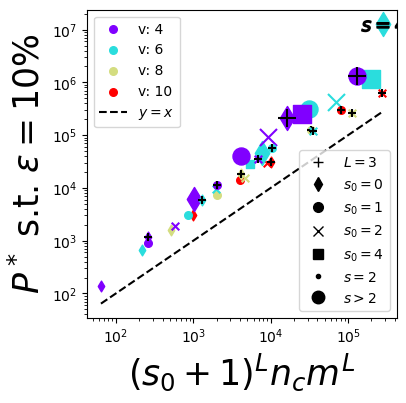

In [53]:
ns = ns = np.array([4,6,8,10])
s0s = [0,1,2,4]
    
Ls= [2,3]
sss = [2,3,4]
net = 'lcn'
colors = cm.rainbow(np.linspace(0, 1, len(ns)))

fig, axs = plt.subplots(1,1, figsize = (4,4))

vs = []




for (idx_L,L) in enumerate(Ls):
    #print('L: '+str(L))
    expo = L
    for (idx_s,s) in enumerate(sss):
        #print('s: '+str(s))
        if s==2:
            alpha = 1
            size = 30
        elif s==3:
            alpha = 1
            size =150
        elif s==4:
            alpha = 1
            size = 150

        for (idx_s0,s0) in enumerate(s0s):
            #print('s0: '+str(s0))

            if s0==0:
                mar = "d"
            elif s0==1:
                mar = "o"
            elif s0==2:
                mar = "x"
            elif s0==4:
                mar = "s"
            elif s0==6:
                mar = "v"
            for (idxn,n) in enumerate(ns):
                m = n**(s-1)
                try:
                    pstars = torch.load('pstars/pstars_task_'+net+'_L_'+str(L)+'_n_'+str(n)+'_m_'+str(m)+'_s_'+str(s)+'_s0_'+str(s0)+"_net_"+net+'.pt') 
                    pstars = np.array(pstars)
                    col = colors[idxn]
                    fact = 1#(s)**(L/2)
                    if pstars:
                        '''
                        if s0>0 and L==2 and s==2:
                            pstars = pstars
                        else:
                        '''
                        pstars = pstars*n
                        if idx_s0==1 and idx_L==0 and idx_s ==0:
                            axs.scatter([fact*((s0+1)**(expo))*n*m**(L)],[pstars],label = r'v: %d'%(n),marker = mar,color = col,s=size, alpha = alpha)
                        else:
                            axs.scatter([fact*((s0+1)**(expo))*n*m**(L)],[pstars],marker = mar,color = col, alpha = alpha,s = size)

                        if L==3:
                            axs.scatter([fact*((s0+1)**(expo))*n*m**(L)],[pstars],marker = '+',color = 'black', alpha = alpha,s = size)
                        if s==4:
                            axs.scatter([fact*((s0+1)**(expo))*n*m**(L)],[pstars],marker = r'$s=4$',color = 'black', alpha = alpha,s = 1000)

                        vs+=[fact*(s0+1)**(expo)*n*m**(L)]
                        #print('ok')
                except:
                    pass
                
min0 = min(vs)
max0 = max(vs)
print(min0,max0)
ps = np.arange(min0,max0,(max0-min0)/20)
C = max(pstars.flatten().tolist())/max0
axs.plot(ps,1*ps,label=r'$y=x$',color='black',ls='--')

axs.set_xscale('log')
axs.set_yscale('log')
axs.set_xlabel(r'$(s_0+1)^{L} n_c m^{L}$',size = 25)
axs.set_ylabel(r'$P^*$ s.t. $\varepsilon = 10\%$',size = 25)
L3 = mlines.Line2D([], [], color='black', marker='+', linestyle='None',
              markersize=7, label=r'$L=3$')

s00 = mlines.Line2D([], [], color='black', marker='d', linestyle='None',
              markersize=7, label=r'$s_0=0$')
s01 = mlines.Line2D([], [], color='black', marker='o', linestyle='None',
              markersize=7, label=r'$s_0=1$')
s02 = mlines.Line2D([], [], color='black', marker='x', linestyle='None',
              markersize=7, label=r'$s_0=2$')
s03 = mlines.Line2D([], [], color='black', marker='s', linestyle='None',
              markersize=7, label=r'$s_0=4$')
s04 = mlines.Line2D([], [], color='black', marker='v', linestyle='None',
              markersize=7, label=r'$s_0=6$')

s2 = mlines.Line2D([], [], color='black', marker='o',  linestyle='None',
              markersize=3, label=r'$s=2$')
s3 = mlines.Line2D([], [], color='black', marker='o', linestyle='None',
              markersize=9, label=r'$s>2$')

first_legend = axs.legend()
ax = axs.add_artist(first_legend)

axs.legend(handles=[L3,s00,s01,s02,s03,s2,s3],loc = 'lower right') 
#second_legend = axs.legend()
#axs.add_artist(second_legend)

#axs.legend(handles=[s2,s3],loc = 'lower left') 
#legend3 = axs.legend(loc='lower right')
#second_legend = axs.legend()
#ax = axs.add_artist(second_legend)
#plt.savefig("figures/pstar_task_lcn_s0_%d.png" %expo, bbox_inches='tight')
#plt.savefig("figures/pstar_task_lcn_s0_%d.pdf" %expo, bbox_inches='tight')
#plt.savefig("figures/pstar_task_lcn_s0_L.png" , bbox_inches='tight')
#plt.savefig("figures/pstar_task_lcn_s0_L.pdf" , bbox_inches='tight')

128.0 763675.3236814714
3072.0 681070.0903490037
Legend
512.0 681070.0903490037


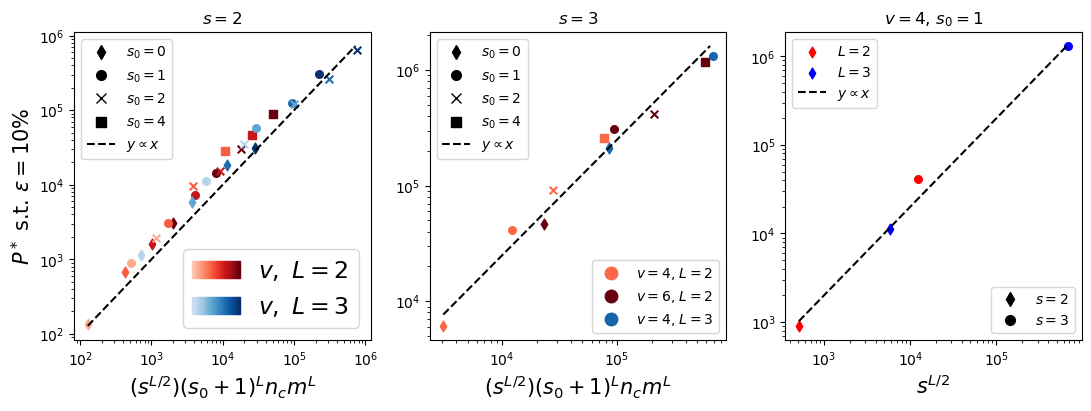

In [4]:
from matplotlib.legend_handler import HandlerTuple
import matplotlib.patches as patches

ns = ns = np.array([4,6,8,10])
s0s = [0,1,2,4]
    
Ls= [2,3]
sss = [2,3]
net = 'lcn'
colors = cm.rainbow(np.linspace(0, 1, len(ns)*len(Ls)))

cmap = plt.cm.get_cmap('Reds')

# Get the colorbar limits
vmin, vmax = 0.3, 1  # Assuming colorbar limits

# Sample k uniformly spaced points between vmin and vmax
sampled_values = np.linspace(vmin, vmax, 4)

# Convert sampled values to colors using the colormap
shades_of_red = [cmap(value) for value in sampled_values]


# Define shades of blue (from dark to light)
#shades_of_blue = ['#00008B', '#191970', '#000080', '#4169E1', '#1E90FF', '#87CEEB'][::-1]

cmap = plt.cm.get_cmap('Blues')

# Get the colorbar limits
vmin, vmax = 0.3, 1  # Assuming colorbar limits

# Sample k uniformly spaced points between vmin and vmax
sampled_values = np.linspace(vmin, vmax, 4)

# Convert sampled values to colors using the colormap
shades_of_blue = [cmap(value) for value in sampled_values]

colors = shades_of_red + shades_of_blue


cmap = plt.cm.get_cmap('Reds')

# Get the colorbar limits
vmin, vmax = 0.5, 1  # Assuming colorbar limits

# Sample k uniformly spaced points between vmin and vmax
sampled_values = np.linspace(vmin, vmax, 2)

# Convert sampled values to colors using the colormap
shades_of_red = [cmap(value) for value in sampled_values]


# Define shades of blue (from dark to light)
#shades_of_blue = ['#00008B', '#191970', '#000080', '#4169E1', '#1E90FF', '#87CEEB'][::-1]

cmap = plt.cm.get_cmap('Blues')

# Get the colorbar limits
vmin, vmax = 0.8, 1  # Assuming colorbar limits

# Sample k uniformly spaced points between vmin and vmax
sampled_values = np.linspace(vmin, vmax, 1)

# Convert sampled values to colors using the colormap
shades_of_blue = [cmap(value) for value in sampled_values]

colors_s3 = shades_of_red + shades_of_blue


fig, axs = plt.subplots(1,3, figsize = (13,4))



idx_s3= 0

for (idx_s,s) in enumerate(sss):
    if s==2:
        idxx = 0
    elif s==3:
        idxx = 1
    #print('s: '+str(s))
    vs = []
    for (idx_L,L) in enumerate(Ls):
        #print('L: '+str(L))
        expo = L
        if L==2:
            alpha = 1
            size = 30
            edge = None
        elif L==3:
            alpha = 1
            size =30
            edge = None


        for (idx_s0,s0) in enumerate(s0s):
            #print('s0: '+str(s0))

            if s0==0:
                mar = "d"
            elif s0==1:
                mar = "o"
            elif s0==2:
                mar = "x"
            elif s0==4:
                mar = "s"
            elif s0==6:
                mar = "v"
            for (idxn,n) in enumerate(ns):
                m = n**(s-1)
                if s==2:
                    col = colors[idxn+idx_L*len(ns)]
                else:
                    if idxn==0 and idx_L==0:
                        col = colors_s3[0]
                    elif idxn==1 and idx_L==0:
                        col = colors_s3[1]
                    elif idxn==0 and idx_L==1:
                        col = colors_s3[2]
                        
                try:
                    pstars = torch.load('pstars/pstars_task_'+net+'_L_'+str(L)+'_n_'+str(n)+'_m_'+str(m)+'_s_'+str(s)+'_s0_'+str(s0)+"_net_"+net+'.pt') 
                    pstars = np.array(pstars)


                    fact = (s)**(L/2)
                    if pstars:
                        '''
                        if s0>0 and L==2 and s==2:
                            pstars = pstars
                        else:
                        '''
                        pstars = pstars*n
                        axs[idxx].scatter([fact*((s0+1)**(expo))*n*m**(L)],[pstars],edgecolors=edge,marker = mar,color = col, alpha = alpha,s = size)

                        #if L==3:
                        #    axs[idxx].scatter([fact*((s0+1)**(expo))*n*m**(L)],[pstars],marker = '+',color = 'black', alpha = alpha,s = size)
                        #if s==4:
                        #    axs[idxx].scatter([fact*((s0+1)**(expo))*n*m**(L)],[pstars],edgecolors=edge,marker = r'$s=4$',color = 'black', alpha = alpha,s = 1000)

                        vs+=[fact*(s0+1)**(expo)*n*m**(L)]
                        #print('ok')
                except:
                    pass #print(col)
                
    min0 = min(vs)
    max0 = max(vs)
    print(min0,max0)
    ps = np.arange(min0,max0,(max0-min0)/20)
    C = max(pstars.flatten().tolist())/max0
    if idxx==0:
        axs[0].plot(ps,1*ps,color='black',ls='--') #label=r'$y\propto x$'
    elif idxx ==1:
        axs[idxx].plot(ps,2.5*ps,color='black',ls='--')
    axs[idxx].set_title(r"$s= %d$" %(s))
    #axs[1].plot(ps,1*ps,label=r'$y=x$',color='black',ls='--')

axs[0].set_xscale('log')
axs[1].set_xscale('log')
axs[0].set_yscale('log')
axs[1].set_yscale('log')

axs[0].set_xlabel(r'$(s^{L/2})(s_0+1)^{L} n_c m^{L}$',size = 15)
axs[1].set_xlabel(r'$(s^{L/2})(s_0+1)^{L} n_c m^{L}$',size = 15)
axs[0].set_ylabel(r'$P^*$ s.t. $\varepsilon = 10\%$',size = 15)
#L3 = mlines.Line2D([], [], color='black', marker='+', linestyle='None',
#              markersize=7, label=r'$L=3$')

s00 = mlines.Line2D([], [], color='black', marker='d', linestyle='None',
              markersize=7, label=r'$s_0=0$')
s01 = mlines.Line2D([], [], color='black', marker='o', linestyle='None',
              markersize=7, label=r'$s_0=1$')
s02 = mlines.Line2D([], [], color='black', marker='x', linestyle='None',
              markersize=7, label=r'$s_0=2$')
s03 = mlines.Line2D([], [], color='black', marker='s', linestyle='None',
              markersize=7, label=r'$s_0=4$')
s04 = mlines.Line2D([], [], color='black', marker='v', linestyle='None',
              markersize=7, label=r'$s_0=6$')
s05 = mlines.Line2D([], [], color='black', linestyle='--',
              markersize=7, label=r'$y\propto x$')

ncmaps = 1     # number of colormaps to draw for illustration
ncolors = 100  # number high enough to draw a smooth gradient for each colormap

# Create random list of colormaps and extract list of colors to 
# draw the gradient of each colormap
cmaps_names = ['Reds', 'Blues'] #list(rng.choice(plt.colormaps(), size=ncmaps))
cmaps = [plt.cm.get_cmap(name) for name in cmaps_names]
cmaps_gradients = [cmap(np.linspace(0.2, 1, ncolors)) for cmap in cmaps]
cmaps_dict = dict(zip(cmaps_names, cmaps_gradients))

# Create a list of lists of patches representing the gradient of each colormap
patches_cmaps_gradients = []
for cmap_name, cmap_colors in cmaps_dict.items():
    cmap_gradient = [patches.Patch(facecolor=c, edgecolor=c, label=cmap_name)
                     for c in cmap_colors]
    patches_cmaps_gradients.append(cmap_gradient)

# Create custom legend (with a large fontsize to better illustrate the result)
first_legend = axs[0].legend(handles=patches_cmaps_gradients, labels=[r'$v,$ $L=2$', r'$v,$ $L=3$'], fontsize=17,
           handler_map={list: HandlerTuple(ndivide=None, pad=0)}, loc = 'lower right')
v0 = mlines.Line2D([], [], color=colors_s3[0], marker='o',  linestyle='None',
              markersize=9, label=r'$v=4$, $L=2$')
v1 = mlines.Line2D([], [], color=colors_s3[1], marker='o', linestyle='None',
              markersize=9, label=r'$v=6$, $L=2$')
v2 = mlines.Line2D([], [], color=colors_s3[2], marker='o', linestyle='None',
              markersize=9, label=r'$v=4$, $L=3$')

first_legend_2 = axs[1].legend(handles=[v0,v1,v2], fontsize=10,loc = 'lower right')
print(first_legend_2)

s2 = mlines.Line2D([], [], color='red', marker='o',  linestyle='None',
              markersize=9, label=r'$L=2$')
s3 = mlines.Line2D([], [], color='blue', marker='o', linestyle='None',
              markersize=9, label=r'$L=3$')
# Add s2 and s3 to the legend
axs[0].add_artist(first_legend)  # Re-add the first legend to the plot
axs[1].add_artist(first_legend_2) 
#second_legend = axs[0].legend(handles=[s2, s3],  fontsize=15, loc= 'lower right', bbox_to_anchor=(1., 0.15))

#ax = axs[0].add_artist(second_legend)
axs[0].legend(handles=[s00,s01,s02,s03,s05],loc = 'upper left') 
axs[1].legend(handles=[s00,s01,s02,s03,s05],loc = 'upper left')
#---------------------------------------------------------

ns = ns = np.array([4])
s0s = [1]
    
Ls= [2,3]
sss = [2,3]
net = 'lcn'
colors = ['red', 'blue']


vs = []
for (idx_s,s) in enumerate(sss):
    if s==2:
        mar = "d"
    elif s==3:
        mar = "o"
    #print('s: '+str(s))

    for (idx_L,L) in enumerate(Ls):
        #print('L: '+str(L))
        col = colors[idx_L]
        expo = L
        if L==2:
            alpha = 1
            size = 30
        elif L==3:
            alpha = 1
            size =30
        

        for (idx_s0,s0) in enumerate(s0s):
            #print('s0: '+str(s0))

            for (idxn,n) in enumerate(ns):
                m = n**(s-1)
                try:
                    pstars = torch.load('pstars/pstars_task_'+net+'_L_'+str(L)+'_n_'+str(n)+'_m_'+str(m)+'_s_'+str(s)+'_s0_'+str(s0)+"_net_"+net+'.pt') 
                    pstars = np.array(pstars)

                    fact = (s)**(0.5*L)
                    if pstars:
                        '''
                        if s0>0 and L==2 and s==2:
                            pstars = pstars
                        else:
                        '''
                        pstars = pstars*n
                        if idx_s0==0 and idx_s ==0:
                            axs[2].scatter([fact*((s0+1)**(expo))*n*m**(L)],[pstars],label = r'$L= %d$'%(L),marker = mar,color = col,s=size, alpha = alpha)
                        else:
                            axs[2].scatter([fact*((s0+1)**(expo))*n*m**(L)],[pstars],marker = mar,color = col, alpha = alpha,s = size)

                        #if L==3:
                        #    axs[idxx].scatter([fact*((s0+1)**(expo))*n*m**(L)],[pstars],marker = '+',color = 'black', alpha = alpha,s = size)
                        if s==4:
                            axs[2].scatter([fact*((s0+1)**(expo))*n*m**(L)],[pstars],marker = r'$s=4$',color = 'black', alpha = alpha,s = 1000)

                        vs+=[fact*(s0+1)**(expo)*n*m**(L)]
                        #print('ok')
                except:
                    pass
                
min0 = min(vs)
max0 = max(vs)
print(min0,max0)
ps = np.arange(min0,max0,(max0-min0)/20)
C = max(pstars.flatten().tolist())/max0
axs[2].plot(ps,2*ps,label=r'$y\propto x$',color='black',ls='--')

axs[2].set_title(r"$v= 4$, $s_0=1$")
#axs[1].plot(ps,1*ps,label=r'$y=x$',color='black',ls='--')

axs[2].set_xscale('log')
axs[2].set_yscale('log')



axs[2].set_xlabel(r'$s^{L/2}$',size = 15)

#axs[2].set_ylabel(r'$P^*$ s.t. $\varepsilon = 10\%$',size = 15)
#L3 = mlines.Line2D([], [], color='black', marker='+', linestyle='None',
#              markersize=7, label=r'$L=3$')

s00 = mlines.Line2D([], [], color='black', marker='d', linestyle='None',
              markersize=7, label=r'$s=2$')
s01 = mlines.Line2D([], [], color='black', marker='o', linestyle='None',
              markersize=7, label=r'$s=3$')



first_legend = axs[2].legend()
ax = axs[2].add_artist(first_legend)

axs[2].legend(handles=[s00,s01],loc = 'lower right') 
plt.savefig("figures/pstar_task_lcn_s0_L_all.png" , bbox_inches='tight')
plt.savefig("figures/pstar_task_lcn_s0_L_all.pdf" , bbox_inches='tight')

[196.] [695630.]
[904.] [642610.]


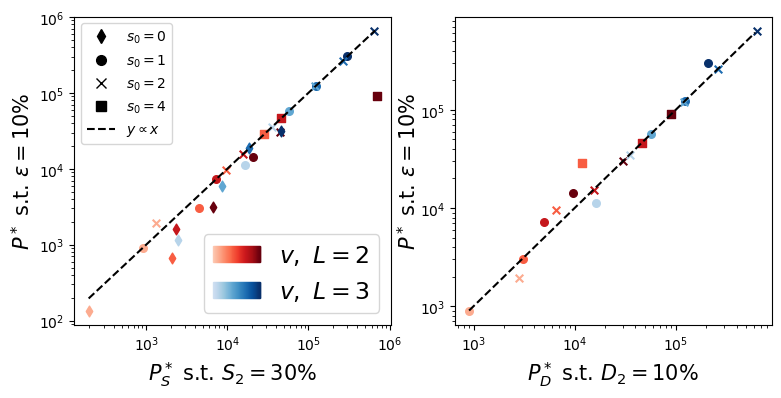

In [15]:
ns = ns = np.array([4,6,8,10])
s0s = [0,1,2,4]
    
Ls= [2,3]
sss = [2]
net = 'lcn'
cmap = plt.cm.get_cmap('Reds')

# Get the colorbar limits
vmin, vmax = 0.3, 1  # Assuming colorbar limits

# Sample k uniformly spaced points between vmin and vmax
sampled_values = np.linspace(vmin, vmax, 4)

# Convert sampled values to colors using the colormap
shades_of_red = [cmap(value) for value in sampled_values]


# Define shades of blue (from dark to light)
#shades_of_blue = ['#00008B', '#191970', '#000080', '#4169E1', '#1E90FF', '#87CEEB'][::-1]

cmap = plt.cm.get_cmap('Blues')

# Get the colorbar limits
vmin, vmax = 0.3, 1  # Assuming colorbar limits

# Sample k uniformly spaced points between vmin and vmax
sampled_values = np.linspace(vmin, vmax, 4)

# Convert sampled values to colors using the colormap
shades_of_blue = [cmap(value) for value in sampled_values]

colors = shades_of_red + shades_of_blue

fig, axs = plt.subplots(1,2, figsize = (9,4))





for (idx_s,s) in enumerate(sss):
    if s==2:
        idxx = 0
    elif s==3:
        idxx = 1
    #print('s: '+str(s))
    vs0 = []
    vs1 = []
    vs2 = []
    for (idx_L,L) in enumerate(Ls):
        #print('L: '+str(L))
        expo = L
        if L==2:
            alpha = 1
            size = 30
        elif L==3:
            alpha = 1
            size =30
        

        for (idx_s0,s0) in enumerate(s0s):
            #print('s0: '+str(s0))

            if s0==0:
                mar = "d"
            elif s0==1:
                mar = "o"
            elif s0==2:
                mar = "x"
            elif s0==4:
                mar = "s"
            elif s0==6:
                mar = "v"
            for (idxn,n) in enumerate(ns):
                m = n**(s-1)
                try:
                    pstars_task = torch.load('pstars/pstars_task_'+net+'_L_'+str(L)+'_n_'+str(n)+'_m_'+str(m)+'_s_'+str(s)+'_s0_'+str(s0)+"_net_"+net+'.pt') 
                    pstars_pos = torch.load('pstars/pstars_pos_'+net+'_L_'+str(L)+'_n_'+str(n)+'_m_'+str(m)+'_s_'+str(s)+'_s0_'+str(s0)+"_net_"+net+'.pt')
                    pstars_sem = torch.load('pstars/pstars_sem_'+net+'_L_'+str(L)+'_n_'+str(n)+'_m_'+str(m)+'_s_'+str(s)+'_s0_'+str(s0)+"_net_"+net+'.pt')
                    pstars_task = np.array(pstars_task)
                    pstars_pos = np.array(pstars_pos)
                    pstars_sem = np.array(pstars_sem)
                    
                    col = colors[idxn+idx_L*len(ns)]
                    fact = (s)**(L/2)
                    if pstars_task:
                        pstars_task = pstars_task*n
                        pstars_sem = pstars_sem*n
                        pstars_pos = pstars_pos*n
                    
                        #if idx_s0==1 and idx_L==0 and idx_s ==0:
                        #    axs[0].scatter([fact*((s0+1)**(expo))*n*m**(L)],[pstars_task],label = r'v: %d'%(n),marker = mar,color = col,s=size, alpha = alpha)
                        #else:
                        #    axs[0].scatter([fact*((s0+1)**(expo))*n*m**(L)],[pstars_task],marker = mar,color = col, alpha = alpha,s = size)
                        axs[0].scatter([pstars_sem ],[pstars_task],marker = mar,color = col, alpha = alpha,s = size)

                        if s0>0:
                            axs[1].scatter([pstars_pos],[pstars_task],marker = mar,color = col, alpha = alpha,s = size)
                            vs2+=[pstars_pos]
                        #vs0+=[fact*(s0+1)**(expo)*n*m**(L)]
                        vs1+=[pstars_sem ]
                        
                        #print('ok')
                except:
                    pass
                

    min0 = min(vs1)
    max0 = max(vs1)
    print(min0,max0)
    ps = np.arange(min0,max0,(max0-min0)/20) 
    axs[0].plot(ps,1*ps,color='black',ls='--')
    
    min0 = min(vs2)
    max0 = max(vs2)
    print(min0,max0)
    ps = np.arange(min0,max0,(max0-min0)/20) 
    axs[1].plot(ps,1*ps,color='black',ls='--')
    
    #axs[1].plot(ps,1*ps,label=r'$y=x$',color='black',ls='--')

axs[0].set_xscale('log')
axs[1].set_xscale('log')
axs[0].set_yscale('log')
axs[1].set_yscale('log')


#axs[0].set_xlabel(r'$(2^{L/2})(s_0+1)^{L} n_c m^{L}$',size = 15)
axs[1].set_xlabel(r'$P_D^*$ s.t. $D_{2} = 10\%$',size = 15)
axs[0].set_xlabel(r'$P_S^*$ s.t. $S_{2} = 30\%$',size = 15)
axs[0].set_ylabel(r'$P^*$ s.t. $\varepsilon= 10\%$',size = 15)
axs[1].set_ylabel(r'$P^*$ s.t. $\varepsilon= 10\%$',size = 15, labelpad = 0)
#L3 = mlines.Line2D([], [], color='black', marker='+', linestyle='None',
#              markersize=7, label=r'$L=3$')

s00 = mlines.Line2D([], [], color='black', marker='d', linestyle='None',
              markersize=7, label=r'$s_0=0$')
s01 = mlines.Line2D([], [], color='black', marker='o', linestyle='None',
              markersize=7, label=r'$s_0=1$')
s02 = mlines.Line2D([], [], color='black', marker='x', linestyle='None',
              markersize=7, label=r'$s_0=2$')
s03 = mlines.Line2D([], [], color='black', marker='s', linestyle='None',
              markersize=7, label=r'$s_0=4$')
#s04 = mlines.Line2D([], [], color='black', marker='v', linestyle='None',
#              markersize=7, label=r'$s_0=6$')
s05 = mlines.Line2D([], [], color='black', linestyle='--',
              markersize=7, label=r'$y\propto x$')


ncmaps = 1     # number of colormaps to draw for illustration
ncolors = 100  # number high enough to draw a smooth gradient for each colormap

# Create random list of colormaps and extract list of colors to 
# draw the gradient of each colormap
cmaps_names = ['Reds', 'Blues'] #list(rng.choice(plt.colormaps(), size=ncmaps))
cmaps = [plt.cm.get_cmap(name) for name in cmaps_names]
cmaps_gradients = [cmap(np.linspace(0.2, 1, ncolors)) for cmap in cmaps]
cmaps_dict = dict(zip(cmaps_names, cmaps_gradients))

# Create a list of lists of patches representing the gradient of each colormap
patches_cmaps_gradients = []
for cmap_name, cmap_colors in cmaps_dict.items():
    cmap_gradient = [patches.Patch(facecolor=c, edgecolor=c, label=cmap_name)
                     for c in cmap_colors]
    patches_cmaps_gradients.append(cmap_gradient)

# Create custom legend (with a large fontsize to better illustrate the result)
first_legend = axs[0].legend(handles=patches_cmaps_gradients, labels=[r'$v,$ $L=2$', r'$v,$ $L=3$'], fontsize=17,
           handler_map={list: HandlerTuple(ndivide=None, pad=0)}, loc = 'lower right')





s2 = mlines.Line2D([], [], color='red', marker='o',  linestyle='None',
              markersize=9, label=r'$L=2$')
s3 = mlines.Line2D([], [], color='blue', marker='o', linestyle='None',
              markersize=9, label=r'$L=3$')
# Add s2 and s3 to the legend
axs[0].add_artist(first_legend)  # Re-add the first legend to the plot
#second_legend = axs[0].legend(handles=[s2, s3],  fontsize=15, loc= 'lower right', bbox_to_anchor=(1., 0.15))

#ax = axs[0].add_artist(second_legend)
axs[0].legend(handles=[s00,s01,s02,s03,s05],loc = 'upper left') 




plt.savefig("figures/pstar_tasksempos_lcn_s0_L_all.png" , bbox_inches='tight')
plt.savefig("figures/pstar_tasksempos_lcn_s0_L_all.pdf" , bbox_inches='tight')

should
[25.]
should
[128.]
should
[409.]
3 3 2
3 3 4
[  13224.         78098.796875  142973.59375   207848.390625
  272723.1875    337597.984375  402472.78125   467347.578125
  532222.375     597097.171875  661971.96875   726846.765625
  791721.5625    856596.359375  921471.15625   986345.953125
 1051220.75     1116095.546875 1180970.34375  1245845.140625]
[52900.] [1310720.]
[  52900.  115791.  178682.  241573.  304464.  367355.  430246.  493137.
  556028.  618919.  681810.  744701.  807592.  870483.  933374.  996265.
 1059156. 1122047. 1184938. 1247829.]


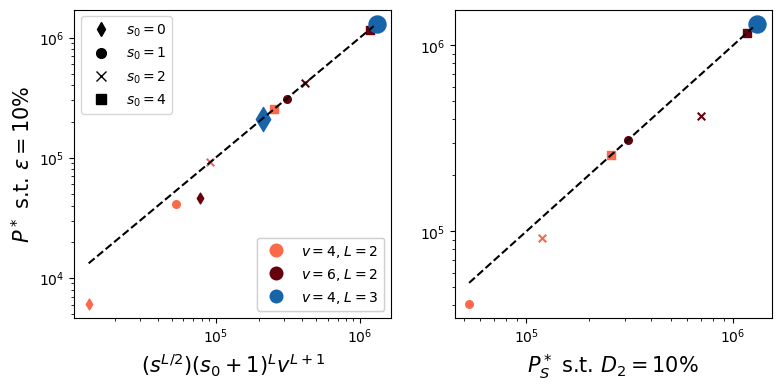

In [5]:
ns = ns = np.array([4,6])
s0s = [0,1,2,4]
    
Ls= [2,3]
sss = [3]
net = 'lcn'
colors = cm.rainbow(np.linspace(0, 1, len(ns)))

cmap = plt.cm.get_cmap('Reds')

# Get the colorbar limits
vmin, vmax = 0.5, 1  # Assuming colorbar limits

# Sample k uniformly spaced points between vmin and vmax
sampled_values = np.linspace(vmin, vmax, 2)

# Convert sampled values to colors using the colormap
shades_of_red = [cmap(value) for value in sampled_values]


# Define shades of blue (from dark to light)
#shades_of_blue = ['#00008B', '#191970', '#000080', '#4169E1', '#1E90FF', '#87CEEB'][::-1]

cmap = plt.cm.get_cmap('Blues')

# Get the colorbar limits
vmin, vmax = 0.8, 1  # Assuming colorbar limits

# Sample k uniformly spaced points between vmin and vmax
sampled_values = np.linspace(vmin, vmax, 1)

# Convert sampled values to colors using the colormap
shades_of_blue = [cmap(value) for value in sampled_values]

colors_s3 = shades_of_red + shades_of_blue

fig, axs = plt.subplots(1,2, figsize = (9,4))



for (idx_s,s) in enumerate(sss):
    if s==2: idxx = 0
    if s==3: idxx = 1
        
    vs0 = []
    vs00 = []
    vs1 = []
    for (idx_L,L) in enumerate(Ls):
   
    
      
        if L==2:
            alpha = 1
            size = 30
        elif L==3:
            alpha = 1
            size =150

        for (idx_s0,s0) in enumerate(s0s):
           

            if s0==0:
                mar = "d"
            elif s0==1:
                mar = "o"
            elif s0==2:
                mar = "x"
            elif s0==4:
                mar = "s"
            elif s0==6:
                mar = "v"
            for (idxn,n) in enumerate(ns):
                m = n**(s-1)
                try:
                    pstars_task = torch.load('pstars/pstars_task_'+net+'_L_'+str(L)+'_n_'+str(n)+'_m_'+str(m)+'_s_'+str(s)+'_s0_'+str(s0)+"_net_"+net+'.pt')
                    pstars_pos = torch.load('pstars/pstars_pos_'+net+'_L_'+str(L)+'_n_'+str(n)+'_m_'+str(m)+'_s_'+str(s)+'_s0_'+str(s0)+"_net_"+net+'.pt')
                    pstars_sem = torch.load('pstars/pstars_sem_'+net+'_L_'+str(L)+'_n_'+str(n)+'_m_'+str(m)+'_s_'+str(s)+'_s0_'+str(s0)+"_net_"+net+'.pt')
                    pstars_task = np.array(pstars_task)
                    pstars_pos = np.array(pstars_pos)
                    pstars_sem = np.array(pstars_sem)
                    if s0==0:
                        print("should")
                        print(pstars_pos)
                    if n==4 and L==2:
                        col = colors_s3[0]
                    if n==6 and L==2:
                        col = colors_s3[1]
                    if n==4 and L==3:
                        col = colors_s3[2]
                    
                    if pstars_task:
                        pstars_task = pstars_task*n
                        pstars_sem = pstars_sem*n
                        pstars_pos = pstars_pos*n
                        fact = s**(L/2)
                        expo = L
                        
                        #axs[0,0].scatter([fact*((s0+1)**(expo))*n*m**(L)],[pstars_task],marker = mar,color = col,s=size, alpha = alpha)

                        axs[0].scatter([pstars_sem],[pstars_task],marker = mar,color = col, alpha = alpha,s = size)
                        if s0>0:
                            axs[1].scatter([pstars_pos],[pstars_task],marker = mar,color = col, alpha = alpha,s = size)


                        vs0+=[pstars_sem]
                        #vs00+=[fact*((s0+1)**(expo))*n*m**(L)]
                        if s0>0:
                            vs1+=[pstars_pos]
                        #print('ok')
                except:
                    if n==4:
                        print(s,L,s0)
                
    min0 = min(vs0)
    max0 = max(vs0)
    #print(min0,max0)
    ps = np.arange(min0,max0,(max0-min0)/20)
    print(ps)
    axs[0].plot(ps,1*ps,label=r'$y=x$',color='black',ls='--')

    min0 = min(vs1)
    max0 = max(vs1)
    print(min0,max0)
    ps = np.arange(min0,max0,(max0-min0)/20)
    print(ps)
    axs[1].plot(ps,1*ps,label=r'$y=x$',color='black',ls='--')


axs[0].set_xscale('log')
axs[0].set_yscale('log')
axs[1].set_xscale('log')
axs[1].set_yscale('log')
axs[0].set_xscale('log')
axs[0].set_yscale('log')
axs[1].set_xscale('log')
axs[1].set_yscale('log')

axs[0].set_ylabel(r'$P^*$ s.t. $\varepsilon = 10\%$',size = 15)
axs[1].set_xlabel(r'$P_S^*$ s.t. $D_{2} = 10\%$',size = 15)
axs[0].set_xlabel(r'$P_S^*$ s.t. $S_{2} = 50\%$',size = 15)
axs[0].set_ylabel(r'$P^*$ s.t. $\varepsilon = 10\%$',size = 15)
axs[0].set_xlabel(r'$(s^{L/2})(s_0+1)^{L} v^{L+1}$',size = 15)

#axs[1].set_xlabel(r'$P^*$ s.t. $\varepsilon = 10\%$',size = 15)
#axs[1,1].set_ylabel(r'$P_D^*$ s.t. $D_{2,1} = 10\%$',size = 15,labelpad = -1)
#axs[0,1].set_ylabel(r'$P_D^*$ s.t. $D_{2,1} = 10\%$',size = 15,labelpad = -1)

s00 = mlines.Line2D([], [], color='black', marker='d', linestyle='None',
              markersize=7, label=r'$s_0=0$')
s01 = mlines.Line2D([], [], color='black', marker='o', linestyle='None',
              markersize=7, label=r'$s_0=1$')
s02 = mlines.Line2D([], [], color='black', marker='x', linestyle='None',
              markersize=7, label=r'$s_0=2$')
s03 = mlines.Line2D([], [], color='black', marker='s', linestyle='None',
              markersize=7, label=r'$s_0=4$')
s04 = mlines.Line2D([], [], color='black', marker='v', linestyle='None',
              markersize=7, label=r'$s_0=6$')

s2 = mlines.Line2D([], [], color='black', marker='o',  linestyle='None',
              markersize=3, label=r'$L=2$')
s3 = mlines.Line2D([], [], color='black', marker='o', linestyle='None',
              markersize=9, label=r'$L=3$')




leg1 = axs[0].legend(handles=[s00,s01,s02,s03],loc = 'upper left') 
ax = axs[0].add_artist(leg1)

v0 = mlines.Line2D([], [], color=colors_s3[0], marker='o',  linestyle='None',
              markersize=9, label=r'$v=4$, $L=2$')
v1 = mlines.Line2D([], [], color=colors_s3[1], marker='o', linestyle='None',
              markersize=9, label=r'$v=6$, $L=2$')
v2 = mlines.Line2D([], [], color=colors_s3[2], marker='o', linestyle='None',
              markersize=9, label=r'$v=4$, $L=3$')

first_legend_2 = axs[0].legend(handles=[v0,v1,v2], fontsize=10,loc = 'lower right')
ax = axs[0].add_artist(first_legend_2)
#
plt.savefig("figures/pstar_tasksempos_lcn_s0_L_s3.png", bbox_inches='tight')
plt.savefig("figures/pstar_tasksempos_lcn_s0_L_s3.pdf" , bbox_inches='tight')

2 2 4
2 3 4
[1.36000000e+02 3.22596992e+04 6.43833984e+04 9.65070977e+04
 1.28630797e+05 1.60754496e+05 1.92878195e+05 2.25001895e+05
 2.57125594e+05 2.89249293e+05 3.21372992e+05 3.53496691e+05
 3.85620391e+05 4.17744090e+05 4.49867789e+05 4.81991488e+05
 5.14115188e+05 5.46238887e+05 5.78362586e+05 6.10486285e+05]
[904.] [642610.]
[   904.          32989.30078125  65074.6015625   97159.90234375
 129245.203125   161330.50390625 193415.8046875  225501.10546875
 257586.40625    289671.70703125 321757.0078125  353842.30859375
 385927.609375   418012.91015625 450098.2109375  482183.51171875
 514268.8125     546354.11328125 578439.4140625  610524.71484375]
3 3 2
3 3 4
[   6120.   71350.  136580.  201810.  267040.  332270.  397500.  462730.
  527960.  593190.  658420.  723650.  788880.  854110.  919340.  984570.
 1049800. 1115030. 1180260. 1245490.]
[40956.] [1310720.]
[  40956.        104444.203125  167932.40625   231420.609375
  294908.8125    358397.015625  421885.21875   485373.421875
 

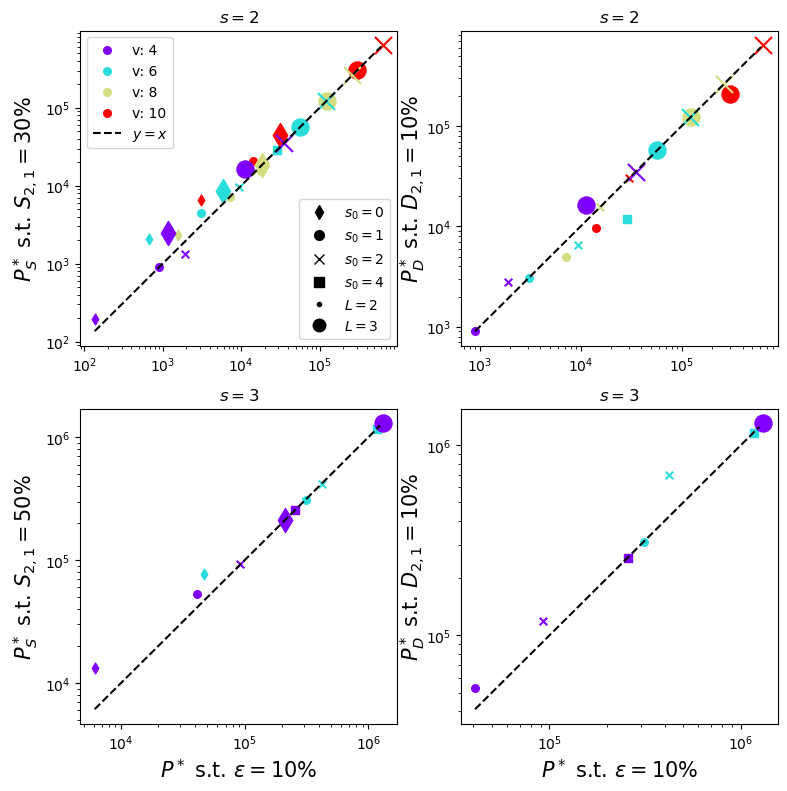

In [4]:
ns = ns = np.array([4,6,8,10])
s0s = [0,1,2,4]
    
Ls= [2,3]
sss = [2,3]
net = 'lcn'
colors = cm.rainbow(np.linspace(0, 1, len(ns)))

fig, axs = plt.subplots(2,2, figsize = (9,9))



for (idx_s,s) in enumerate(sss):
    if s==2: idxx = 0
    if s==3: idxx = 1
        
    vs0 = []
    vs1 = []
    for (idx_L,L) in enumerate(Ls):
   
    
      
        if L==2:
            alpha = 1
            size = 30
        elif L==3:
            alpha = 1
            size =150

        for (idx_s0,s0) in enumerate(s0s):
           

            if s0==0:
                mar = "d"
            elif s0==1:
                mar = "o"
            elif s0==2:
                mar = "x"
            elif s0==4:
                mar = "s"
            elif s0==6:
                mar = "v"
            for (idxn,n) in enumerate(ns):
                m = n**(s-1)
                try:
                    pstars_task = torch.load('pstars/pstars_task_'+net+'_L_'+str(L)+'_n_'+str(n)+'_m_'+str(m)+'_s_'+str(s)+'_s0_'+str(s0)+"_net_"+net+'.pt')
                    pstars_pos = torch.load('pstars/pstars_pos_'+net+'_L_'+str(L)+'_n_'+str(n)+'_m_'+str(m)+'_s_'+str(s)+'_s0_'+str(s0)+"_net_"+net+'.pt')
                    pstars_sem = torch.load('pstars/pstars_sem_'+net+'_L_'+str(L)+'_n_'+str(n)+'_m_'+str(m)+'_s_'+str(s)+'_s0_'+str(s0)+"_net_"+net+'.pt')
                    pstars_task = np.array(pstars_task)
                    pstars_pos = np.array(pstars_pos)
                    pstars_sem = np.array(pstars_sem)
                    col = colors[idxn]
                    
                    if pstars_task:
                        pstars_task = pstars_task*n
                        pstars_sem = pstars_sem*n
                        pstars_pos = pstars_pos*n
                        
                        if idx_s0==1 and idx_L==0 and idx_s ==0:
                            axs[idxx,0].scatter([pstars_task],[pstars_sem],label = r'v: %d'%(n),marker = mar,color = col,s=size, alpha = alpha)
                            axs[idxx,1].scatter([pstars_task],[pstars_pos],marker = mar,color = col,s=size, alpha = alpha)

                        else:
                            axs[idxx,0].scatter([pstars_task],[pstars_sem],marker = mar,color = col, alpha = alpha,s = size)
                            if s0>0:
                                axs[idxx,1].scatter([pstars_task],[pstars_pos],marker = mar,color = col, alpha = alpha,s = size)


                        vs0+=[pstars_task]
                        if s0>0:
                            vs1+=[pstars_task]
                        #print('ok')
                except:
                    if n==4:
                        print(s,L,s0)
                
    min0 = min(vs0)
    max0 = max(vs0)
    #print(min0,max0)
    ps = np.arange(min0,max0,(max0-min0)/20)
    print(ps)
    axs[idxx,0].plot(ps,1*ps,label=r'$y=x$',color='black',ls='--')
    min0 = min(vs1)
    max0 = max(vs1)
    print(min0,max0)
    ps = np.arange(min0,max0,(max0-min0)/20)
    print(ps)
    axs[idxx,1].plot(ps,1*ps,label=r'$y=x$',color='black',ls='--')


axs[0,0].set_xscale('log')
axs[0,0].set_yscale('log')
axs[0,1].set_xscale('log')
axs[0,1].set_yscale('log')
axs[1,0].set_xscale('log')
axs[1,0].set_yscale('log')
axs[1,1].set_xscale('log')
axs[1,1].set_yscale('log')

axs[1,0].set_xlabel(r'$P^*$ s.t. $\varepsilon = 10\%$',size = 15)
axs[1,1].set_xlabel(r'$P^*$ s.t. $\varepsilon = 10\%$',size = 15)
axs[1,0].set_ylabel(r'$P_S^*$ s.t. $S_{2,1} = 50\%$',size = 15)
axs[0,0].set_ylabel(r'$P_S^*$ s.t. $S_{2,1} = 30\%$',size = 15)

#axs[1].set_xlabel(r'$P^*$ s.t. $\varepsilon = 10\%$',size = 15)
axs[1,1].set_ylabel(r'$P_D^*$ s.t. $D_{2,1} = 10\%$',size = 15,labelpad = -1)
axs[0,1].set_ylabel(r'$P_D^*$ s.t. $D_{2,1} = 10\%$',size = 15,labelpad = -1)

s00 = mlines.Line2D([], [], color='black', marker='d', linestyle='None',
              markersize=7, label=r'$s_0=0$')
s01 = mlines.Line2D([], [], color='black', marker='o', linestyle='None',
              markersize=7, label=r'$s_0=1$')
s02 = mlines.Line2D([], [], color='black', marker='x', linestyle='None',
              markersize=7, label=r'$s_0=2$')
s03 = mlines.Line2D([], [], color='black', marker='s', linestyle='None',
              markersize=7, label=r'$s_0=4$')
s04 = mlines.Line2D([], [], color='black', marker='v', linestyle='None',
              markersize=7, label=r'$s_0=6$')

s2 = mlines.Line2D([], [], color='black', marker='o',  linestyle='None',
              markersize=3, label=r'$L=2$')
s3 = mlines.Line2D([], [], color='black', marker='o', linestyle='None',
              markersize=9, label=r'$L=3$')

first_legend = axs[0,0].legend()
ax = axs[0,0].add_artist(first_legend)

axs[0,0].legend(handles=[s00,s01,s02,s03,s2,s3],loc = 'lower right') 
#second_legend = axs.legend()
axs[0,0].set_title(r"$s=2$")
axs[0,1].set_title(r"$s=2$")

axs[1,0].set_title(r"$s=3$")#,y=1.0,pad = -14)
axs[1,1].set_title(r"$s=3$")#,y=1.0,pad = -14)
#axs.legend(handles=[s2,s3],loc = 'lower left') 
#legend3 = axs.legend(loc='lower right')
#second_legend = axs.legend()
#ax = axs.add_artist(second_legend)
plt.savefig("figures/pstar_sem_pos_lcn_s0_L.png", bbox_inches='tight')
plt.savefig("figures/pstar_sem_pos_lcn_s0_L.pdf" , bbox_inches='tight')

256 270000


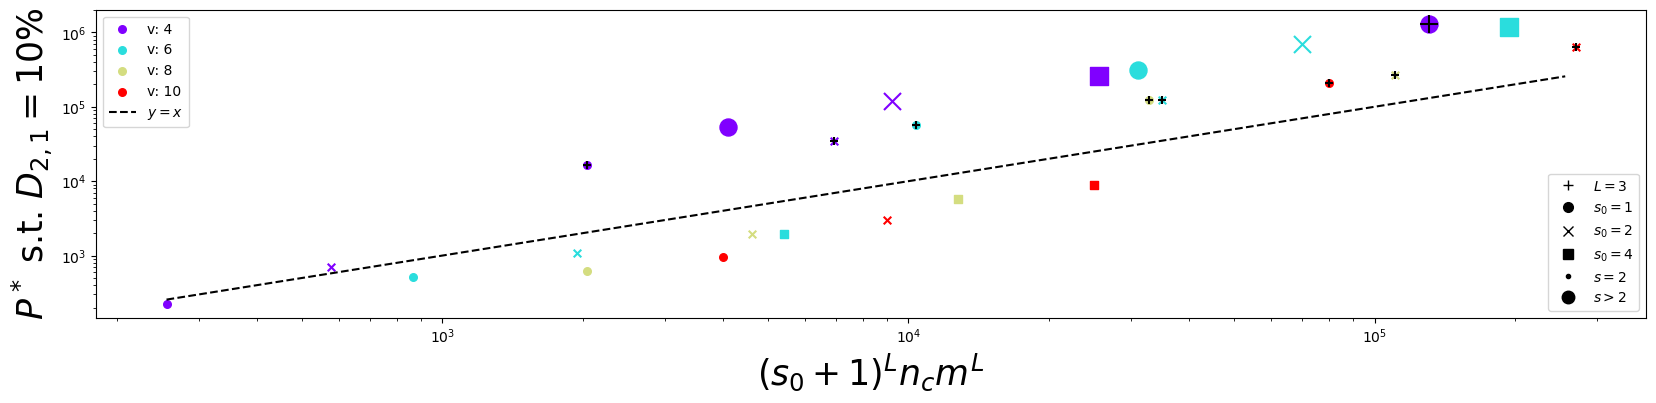

In [3]:
ns = ns = np.array([4,6,8,10])
s0s = [1,2,4,6]
    
Ls= [2,3]
sss = [2,3,4]
net = 'lcn'
colors = cm.rainbow(np.linspace(0, 1, len(ns)))

fig, axs = plt.subplots(1,1, figsize = (20,4))

vs = []


for (idx_L,L) in enumerate(Ls):
    #print('L: '+str(L))
    for (idx_s,s) in enumerate(sss):
        #print('s: '+str(s))
        if s==2:
            alpha = 1
            size = 30
        elif s==3:
            alpha = 1
            size =150
        elif s==4:
            alpha = 1
            size = 150

        for (idx_s0,s0) in enumerate(s0s):
            #print('s0: '+str(s0))

            if s0==0:
                mar = "d"
            elif s0==1:
                mar = "o"
            elif s0==2:
                mar = "x"
            elif s0==4:
                mar = "s"
            elif s0==6:
                mar = "v"
            for (idxn,n) in enumerate(ns):
                m = n**(s-1)
                try:
                    pstars = torch.load('pstars/pstars_pos_'+net+'_L_'+str(L)+'_n_'+str(n)+'_m_'+str(m)+'_s_'+str(s)+'_s0_'+str(s0)+"_net_"+net+'.pt') 
                    pstars = np.array(pstars)
                    col = colors[idxn]
                    
                    if pstars:
                        if s0>0 and L==2 and s==2:
                            pstars = pstars
                        else:
                            pstars = pstars*n
                        if idx_s0==0 and idx_L==0 and idx_s ==0:
                            axs.scatter([((s0+1)**(L))*n*m**(L)],[pstars],label = r'v: %d'%(n),marker = mar,color = col,s=size, alpha = alpha)
                        else:
                            axs.scatter([((s0+1)**(L))*n*m**(L)],[pstars],marker = mar,color = col, alpha = alpha,s = size)

                        if L==3:
                            axs.scatter([((s0+1)**(L))*n*m**(L)],[pstars],marker = '+',color = 'black', alpha = alpha,s = size)
                        if s==4:
                            axs.scatter([((s0+1)**(L))*n*m**(L)],[pstars],marker = r'$s=4$',color = 'black', alpha = alpha,s = 1000)

                        vs+=[(s0+1)**(L)*n*m**(L)]
                        #print('ok')
                        
                        if L==2 and v==6 and s==2:
                            print(pstars)
                except:
                    pass
                
min0 = min(vs)
max0 = max(vs)
print(min0,max0)
ps = np.arange(min0,max0,(max0-min0)/20)
C = max(pstars.flatten().tolist())/max0
axs.plot(ps,1*ps,label=r'$y=x$',color='black',ls='--')

axs.set_xscale('log')
axs.set_yscale('log')
axs.set_xlabel(r'$(s_0+1)^{L} n_c m^{L}$',size = 25)
axs.set_ylabel(r'$P^*$ s.t. $D_{2,1} = 10\%$',size = 25)
L3 = mlines.Line2D([], [], color='black', marker='+', linestyle='None',
              markersize=7, label=r'$L=3$')

s00 = mlines.Line2D([], [], color='black', marker='d', linestyle='None',
              markersize=7, label=r'$s_0=0$')
s01 = mlines.Line2D([], [], color='black', marker='o', linestyle='None',
              markersize=7, label=r'$s_0=1$')
s02 = mlines.Line2D([], [], color='black', marker='x', linestyle='None',
              markersize=7, label=r'$s_0=2$')
s03 = mlines.Line2D([], [], color='black', marker='s', linestyle='None',
              markersize=7, label=r'$s_0=4$')
s04 = mlines.Line2D([], [], color='black', marker='v', linestyle='None',
              markersize=7, label=r'$s_0=6$')

s2 = mlines.Line2D([], [], color='black', marker='o',  linestyle='None',
              markersize=3, label=r'$s=2$')
s3 = mlines.Line2D([], [], color='black', marker='o', linestyle='None',
              markersize=9, label=r'$s>2$')

first_legend = axs.legend()
ax = axs.add_artist(first_legend)

axs.legend(handles=[L3,s01,s02,s03,s2,s3],loc = 'lower right') 
#second_legend = axs.legend()
#axs.add_artist(second_legend)

#axs.legend(handles=[s2,s3],loc = 'lower left') 
#legend3 = axs.legend(loc='lower right')
#second_legend = axs.legend()
#ax = axs.add_artist(second_legend)
plt.savefig("figures/pstar_pos_lcn_s0_L.png", bbox_inches='tight')
plt.savefig("figures/pstar_pos_lcn_s0_L.pdf" , bbox_inches='tight')

In [ ]:
ns = ns = np.array([4,6,8,10])
s0s = [0,1,2,4]
    
Ls= [2,3]
sss = [2,3]
net = 'lcn'
colors = cm.rainbow(np.linspace(0, 1, len(ns)))

fig, axs = plt.subplots(1,3, figsize = (13,4))





for (idx_s,s) in enumerate(sss):
    if s==2:
        idxx = 0
    elif s==3:
        idxx = 1
    #print('s: '+str(s))
    vs = []
    for (idx_L,L) in enumerate(Ls):
        #print('L: '+str(L))
        expo = L
        if L==2:
            alpha = 1
            size = 30
        elif L==3:
            alpha = 1
            size =150
        

        for (idx_s0,s0) in enumerate(s0s):
            #print('s0: '+str(s0))

            if s0==0:
                mar = "d"
            elif s0==1:
                mar = "o"
            elif s0==2:
                mar = "x"
            elif s0==4:
                mar = "s"
            elif s0==6:
                mar = "v"
            for (idxn,n) in enumerate(ns):
                m = n**(s-1)
                try:
                    pstars = torch.load('pstars/pstars_task_'+net+'_L_'+str(L)+'_n_'+str(n)+'_m_'+str(m)+'_s_'+str(s)+'_s0_'+str(s0)+"_net_"+net+'.pt') 
                    pstars = np.array(pstars)
                    col = colors[idxn]
                    fact = (s)**(L/2)
                    if pstars:
                        '''
                        if s0>0 and L==2 and s==2:
                            pstars = pstars
                        else:
                        '''
                        pstars = pstars*n
                        if idx_s0==1 and idx_L==0 and idx_s ==0:
                            axs[idxx].scatter([fact*((s0+1)**(expo))*n*m**(L)],[pstars],label = r'v: %d'%(n),marker = mar,color = col,s=size, alpha = alpha)
                        else:
                            axs[idxx].scatter([fact*((s0+1)**(expo))*n*m**(L)],[pstars],marker = mar,color = col, alpha = alpha,s = size)

                        #if L==3:
                        #    axs[idxx].scatter([fact*((s0+1)**(expo))*n*m**(L)],[pstars],marker = '+',color = 'black', alpha = alpha,s = size)
                        if s==4:
                            axs[idxx].scatter([fact*((s0+1)**(expo))*n*m**(L)],[pstars],marker = r'$s=4$',color = 'black', alpha = alpha,s = 1000)

                        vs+=[fact*(s0+1)**(expo)*n*m**(L)]
                        #print('ok')
                except:
                    pass
                
    min0 = min(vs)
    max0 = max(vs)
    print(min0,max0)
    ps = np.arange(min0,max0,(max0-min0)/20)
    C = max(pstars.flatten().tolist())/max0
    if idxx==0:
        axs[0].plot(ps,1*ps,label=r'$y=x$',color='black',ls='--')
    elif idxx ==1:
        axs[idxx].plot(ps,2.5*ps,label=r'$y=x$',color='black',ls='--')
    axs[idxx].set_title(r"$s= %d$" %(s))
    #axs[1].plot(ps,1*ps,label=r'$y=x$',color='black',ls='--')

axs[0].set_xscale('log')
axs[1].set_xscale('log')
axs[0].set_yscale('log')
axs[1].set_yscale('log')

axs[0].set_xlabel(r'$(2^{L/2})(s_0+1)^{L} v^{L+1}$',size = 15)
axs[1].set_xlabel(r'$(3^{L/2})(s_0+1)^{L} v^{L+1}$',size = 15)
axs[0].set_ylabel(r'$P^*$ s.t. $\varepsilon = 10\%$',size = 15)
#L3 = mlines.Line2D([], [], color='black', marker='+', linestyle='None',
#              markersize=7, label=r'$L=3$')

s00 = mlines.Line2D([], [], color='black', marker='d', linestyle='None',
              markersize=7, label=r'$s_0=0$')
s01 = mlines.Line2D([], [], color='black', marker='o', linestyle='None',
              markersize=7, label=r'$s_0=1$')
s02 = mlines.Line2D([], [], color='black', marker='x', linestyle='None',
              markersize=7, label=r'$s_0=2$')
s03 = mlines.Line2D([], [], color='black', marker='s', linestyle='None',
              markersize=7, label=r'$s_0=4$')
s04 = mlines.Line2D([], [], color='black', marker='v', linestyle='None',
              markersize=7, label=r'$s_0=6$')

s2 = mlines.Line2D([], [], color='black', marker='o',  linestyle='None',
              markersize=3, label=r'$L=2$')
s3 = mlines.Line2D([], [], color='black', marker='o', linestyle='None',
              markersize=9, label=r'$L=3$')

first_legend = axs[0].legend()
ax = axs[0].add_artist(first_legend)

axs[0].legend(handles=[s00,s01,s02,s03,s2,s3],loc = 'lower right') 
#second_legend = axs.legend()
#axs.add_artist(second_legend)

#axs.legend(handles=[s2,s3],loc = 'lower left') 
#legend3 = axs.legend(loc='lower right')
#second_legend = axs.legend()

ns = ns = np.array([4])
s0s = [1]
    
Ls= [2,3]
sss = [2,3]
net = 'lcn'
colors = cm.rainbow(np.linspace(0, 1, len(Ls)))


vs = []
for (idx_s,s) in enumerate(sss):
    if s==2:
        mar = "d"
    elif s==3:
        mar = "o"
    #print('s: '+str(s))

    for (idx_L,L) in enumerate(Ls):
        #print('L: '+str(L))
        col = colors[idx_L]
        expo = L
        if L==2:
            alpha = 1
            size = 30
        elif L==3:
            alpha = 1
            size =30
        

        for (idx_s0,s0) in enumerate(s0s):
            #print('s0: '+str(s0))

            for (idxn,n) in enumerate(ns):
                m = n**(s-1)
                try:
                    pstars = torch.load('pstars/pstars_task_'+net+'_L_'+str(L)+'_n_'+str(n)+'_m_'+str(m)+'_s_'+str(s)+'_s0_'+str(s0)+"_net_"+net+'.pt') 
                    pstars = np.array(pstars)
                    
                    fact = (s)**(0.5*L)
                    if pstars:
                        '''
                        if s0>0 and L==2 and s==2:
                            pstars = pstars
                        else:
                        '''
                        pstars = pstars*n
                        if idx_s0==0 and idx_s ==1:
                            axs[2].scatter([fact*((s0+1)**(expo))*n*m**(L)],[pstars],label = r'$L: %d$'%(L),marker = mar,color = col,s=size, alpha = alpha)
                        else:
                            axs[2].scatter([fact*((s0+1)**(expo))*n*m**(L)],[pstars],marker = mar,color = col, alpha = alpha,s = size)

                        #if L==3:
                        #    axs[idxx].scatter([fact*((s0+1)**(expo))*n*m**(L)],[pstars],marker = '+',color = 'black', alpha = alpha,s = size)
                        if s==4:
                            axs[2].scatter([fact*((s0+1)**(expo))*n*m**(L)],[pstars],marker = r'$s=4$',color = 'black', alpha = alpha,s = 1000)

                        vs+=[fact*(s0+1)**(expo)*n*m**(L)]
                        #print('ok')
                except:
                    pass
                
min0 = min(vs)
max0 = max(vs)
print(min0,max0)
ps = np.arange(min0,max0,(max0-min0)/20)
C = max(pstars.flatten().tolist())/max0
axs[2].plot(ps,2*ps,label=r'$y=x$',color='black',ls='--')

axs[2].set_title(r"$v= 4$, $s_0=1$")
#axs[1].plot(ps,1*ps,label=r'$y=x$',color='black',ls='--')

axs[2].set_xscale('log')
axs[2].set_yscale('log')



axs[2].set_xlabel(r'$s^{L/2}$',size = 15)

#axs[2].set_ylabel(r'$P^*$ s.t. $\varepsilon = 10\%$',size = 15)
#L3 = mlines.Line2D([], [], color='black', marker='+', linestyle='None',
#              markersize=7, label=r'$L=3$')

s00 = mlines.Line2D([], [], color='black', marker='d', linestyle='None',
              markersize=7, label=r'$s=2$')
s01 = mlines.Line2D([], [], color='black', marker='o', linestyle='None',
              markersize=7, label=r'$s=3$')



first_legend = axs[2].legend()
ax = axs[2].add_artist(first_legend)

axs[2].legend(handles=[s00,s01],loc = 'lower right') 
plt.savefig("figures/pstar_task_lcn_s0_L_all.png" , bbox_inches='tight')
plt.savefig("figures/pstar_task_lcn_s0_L_all.pdf" , bbox_inches='tight')